## Preparação do ambiente

In [1]:
import numpy as np 
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Scatteplot em matriz com hue = “Gender”

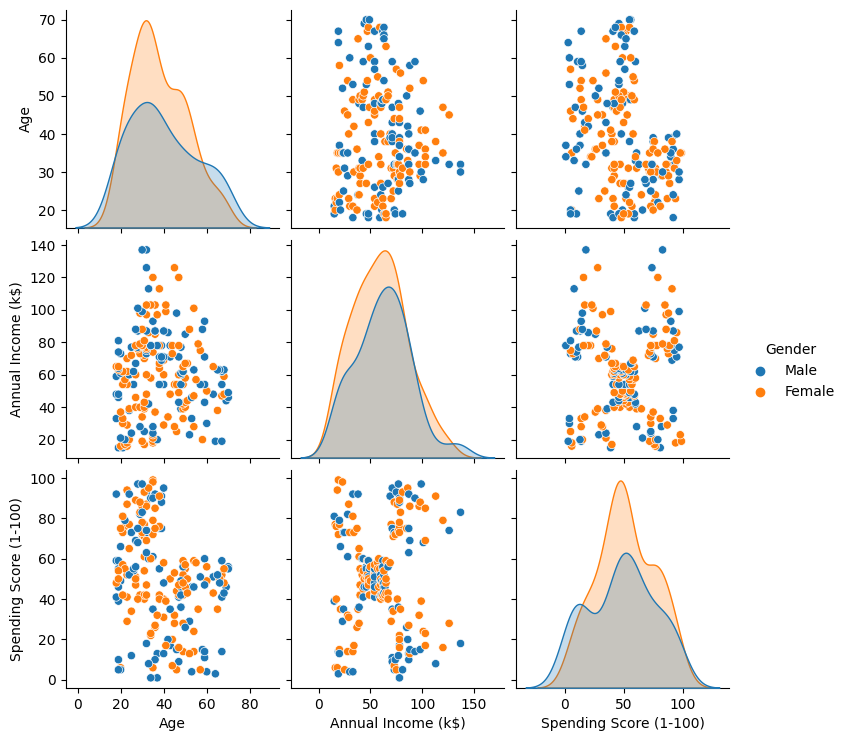

In [3]:
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender')

embora a dispersão dos pontos seja similar entre homens e mulheres, há algumas diferenças sutis. As mulheres tendem a ter uma renda anual mais alta em faixas de idade superiores, enquanto os homens apresentam uma distribuição de renda mais uniforme. Além disso, as curvas de densidade sugerem que as mulheres têm um pico de idade um pouco mais elevado em relação aos homens para as mesmas faixas de renda e pontuação de gastos.

In [4]:
df_income_spending = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()
df_income_spending.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Kmeans com 8 clusters (padrão do sklearn)

In [5]:
kmeans_default = KMeans(random_state = 0)
kmeans_default.fit(df_income_spending) 

KMeans(random_state=0)

In [6]:
labels_default = kmeans_default.labels_

centroids_default = kmeans_default.cluster_centers_
print("Centroids com K=8 (padrão do sklearn)\n")
print(centroids_default)

Centroids com K=8 (padrão do sklearn)

[[ 78.03571429  81.89285714]
 [ 61.30188679  48.24528302]
 [ 79.70833333  14.29166667]
 [ 25.14285714  19.52380952]
 [ 24.95        81.        ]
 [ 43.96969697  51.12121212]
 [109.7         22.        ]
 [108.18181818  82.72727273]]


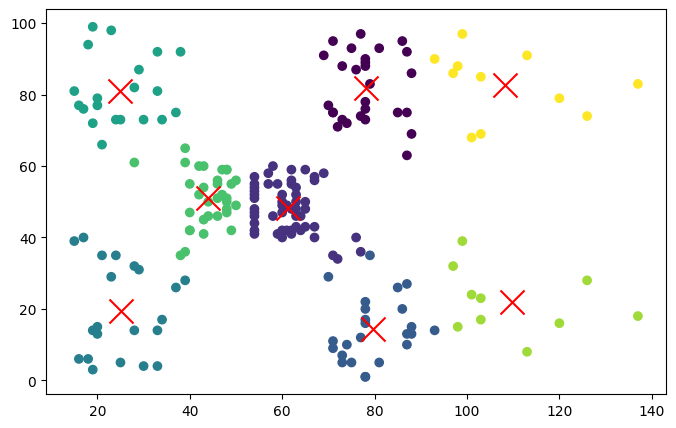

In [7]:
x_centroids, y_centroids = centroids_default.T

plt.figure(figsize=(8,5))
plt.scatter(df_income_spending['Annual Income (k$)'],
            df_income_spending['Spending Score (1-100)'],
            c=labels_default, cmap='viridis')


plt.scatter(x_centroids, y_centroids, c='red', s=300, marker='x')

## Curva de cotovelo para determinação ideal de numero de clusters

In [8]:
intertia = []
k_values = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_income_spending)
    intertia.append(kmeans.inertia_)
    k_values.append(i)

Text(0.5, 1.0, 'Curva de Cotovelo')

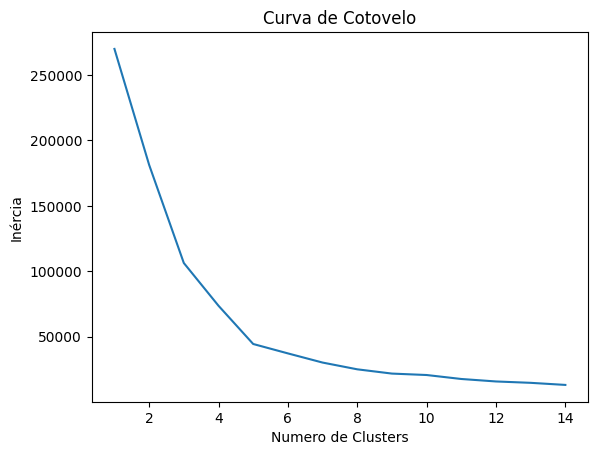

In [9]:
plt.plot(k_values, intertia)
plt.xlabel("Numero de Clusters")
plt.ylabel("Inércia")
plt.title("Curva de Cotovelo")

## Kmeans com 5 clusters

In [10]:
kmeans_adjusted = KMeans(n_clusters=5, random_state = 0)
kmeans_adjusted.fit(df_income_spending) 

KMeans(n_clusters=5, random_state=0)

In [11]:
labels_adjusted = kmeans_adjusted.labels_

centroids_adjusted = kmeans_adjusted.cluster_centers_
print("Centroids com K=5\n")
print(centroids_default)

Centroids com K=5

[[ 78.03571429  81.89285714]
 [ 61.30188679  48.24528302]
 [ 79.70833333  14.29166667]
 [ 25.14285714  19.52380952]
 [ 24.95        81.        ]
 [ 43.96969697  51.12121212]
 [109.7         22.        ]
 [108.18181818  82.72727273]]


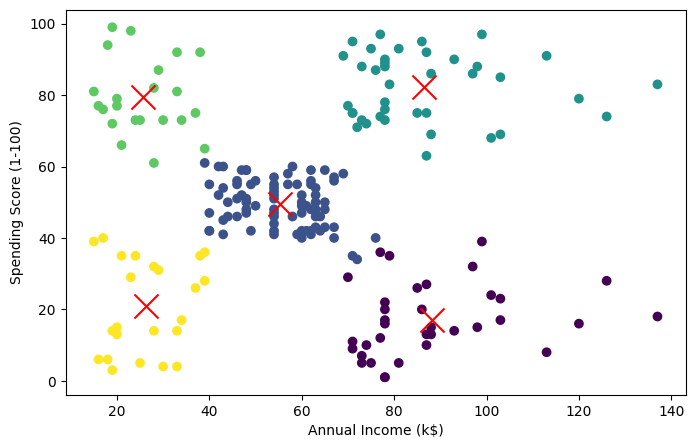

In [12]:
x_centroids, y_centroids = centroids_adjusted.T

plt.figure(figsize=(8,5))
plt.scatter(df_income_spending['Annual Income (k$)'],
            df_income_spending['Spending Score (1-100)'],
            c=labels_adjusted, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.scatter(x_centroids, y_centroids, c='red', s=300, marker='x')

Após verificar o K-means com 8 clusters (valor padrão do sklearn) e com 5 clusters (valor obtido a partir da análise da curva do cotovelo), visualmente é possível notar um agrupamento mais plausível e convincente com 5 clusters.

O groupo para qual provavelmente deveria ser direcionado uma campanha de marketing é o da cor ciano ja que possui o mior spending score e a maior renda anual.

